In [1]:
import pandas as pd

# Load the Titanic dataset
data = pd.read_csv('Titanic_train.csv')  # Use the actual file path
print(data.head())  # Check the first few rows of the dataset


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
#Handle Missing Values
from sklearn.impute import SimpleImputer

# Impute missing values in 'Age' with the median value
imputer = SimpleImputer(strategy='median')
data['Age'] = imputer.fit_transform(data[['Age']])

# Drop unnecessary columns ('Name', 'Ticket', 'Cabin', 'PassengerId')
data = data.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])

# Check for missing values
print(data.isnull().sum())


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64


In [3]:
#Convert Categorical Variables to Numerical
# Convert categorical 'Sex' and 'Embarked' columns to numerical using OneHotEncoding
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Check the first few rows after encoding
print(data.head())


   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [4]:
#Split Data into Features (X) and Target (y)
X = data.drop(columns=['Survived'])  # All columns except 'Survived' as features
y = data['Survived']  # 'Survived' as the target variable

# Check the shapes of X and y
print(X.shape, y.shape)


(891, 8) (891,)


In [5]:
#Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and test sets
print(X_train.shape, X_test.shape)


(712, 8) (179, 8)


In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Initialize scaler and fit-transform the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Check the scaled features
print(X_train_scaled[:5])  # First 5 rows of scaled data


[[-1.61413602  1.25364106 -0.47072241 -0.47934164 -0.07868358  0.7243102
  -0.30335547  0.59681695]
 [-0.40055118 -0.47728355 -0.47072241 -0.47934164 -0.37714494  0.7243102
  -0.30335547  0.59681695]
 [ 0.81303367  0.21508629 -0.47072241 -0.47934164 -0.47486697  0.7243102
  -0.30335547  0.59681695]
 [ 0.81303367 -0.24649361  0.37992316 -0.47934164 -0.47623026  0.7243102
  -0.30335547  0.59681695]
 [ 0.81303367 -1.78509326  2.93185988  2.04874166 -0.02524937 -1.38062393
  -0.30335547  0.59681695]]


In [7]:
#Train the Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Create logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model using the scaled training data
logreg.fit(X_train_scaled, y_train)

# Model is trained
print("Model Trained Successfully")


Model Trained Successfully


In [8]:
# Make predictions on the test data
y_pred = logreg.predict(X_test_scaled)

# Print the predictions for the first 5 test samples
print(y_pred[:5])


[0 0 0 1 1]


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888


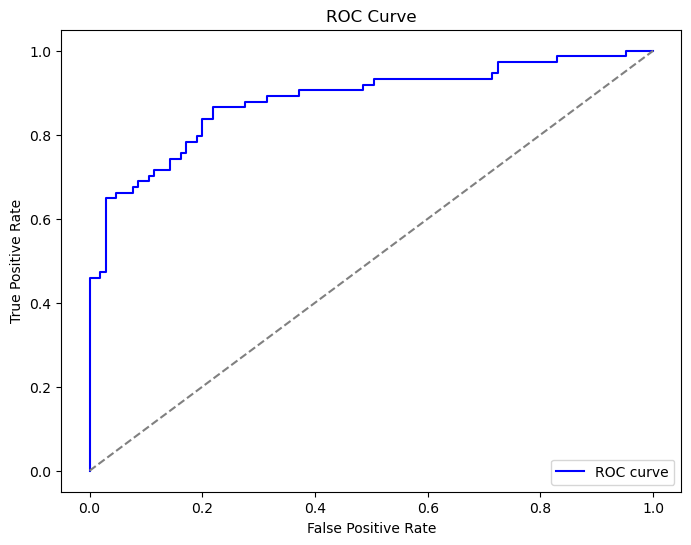

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [11]:
# Display the coefficients of the model
coefficients = logreg.coef_[0]
feature_names = X.columns  # Feature names from the dataset

# Print the feature names and their corresponding coefficients
for feature, coef in zip(feature_names, coefficients):
    print(f'{feature}: {coef}')


Pclass: -0.7844411328963402
Age: -0.39691866848669605
SibSp: -0.34885120889926535
Parch: -0.09540089968844524
Fare: 0.12458723751447418
Sex_male: -1.2756996972131658
Embarked_Q: -0.04901864996479761
Embarked_S: -0.19619573476124305


In [ ]:
#Summary of Steps:
#Load Data and Preprocess (handle missing values and encode categorical features).
#Split the data into training and test sets.
#Scale the features for better performance in Logistic Regression.
#Train the Logistic Regression model.
Make Predictions using the test data.

Evaluate the model using accuracy, precision, recall, F1 score, and ROC curve.

Interpret the model’s coefficients.